In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tools as tl
import matplotlib.pyplot as plt
import matplotlib.colors as clt
import matplotlib.animation as animation
import re

sns.set_style("ticks")

colors =['#b75c83', '#9cd8a8','#2f9090']
success_palette = sns.set_palette(sns.color_palette(colors))

path = './figures/paper/4_initial_profile/'
extension = '.png'

top_directory = "./output/" #os.getcwd()
files, runs = tl.view_runs(top_directory)
runs

,number_of_rows,number_of_columns,grid_option,grazing,neighborhood_threshold,initial_coral_percent,initial_macroalgae_percent,r,d,a,y,number_of_timesteps,record_rate,number_of_simulations,file
0,25,25,0,42,145,33,33,10,40,20,75,3000,10,100,0
1,25,25,0,56,145,33,33,10,40,20,75,3000,10,100,1
2,25,25,0,51,1100,33,33,10,40,20,75,3000,10,100,2
3,25,25,0,51,1100,15,40,10,40,20,75,3000,10,100,3
4,25,25,0,51,500,33,33,10,40,20,75,3000,10,100,4
5,25,25,0,51,145,33,33,10,40,20,75,3000,10,100,5
6,25,25,0,51,145,15,40,10,40,20,75,3000,10,100,6
7,25,25,0,51,3600,33,33,10,40,20,75,3000,10,100,7
8,25,25,0,51,3600,15,40,10,40,20,75,3000,10,100,8
9,25,25,0,48,145,33,33,10,40,20,75,3000,10,100,9


## Look at low initial coral

In [2]:
subset = runs[(runs['neighborhood_threshold']==145)&
              (runs['initial_coral_percent']==15)&
              (runs['number_of_rows']==25)]
subset

,number_of_rows,number_of_columns,grid_option,grazing,neighborhood_threshold,initial_coral_percent,initial_macroalgae_percent,r,d,a,y,number_of_timesteps,record_rate,number_of_simulations,file
6,25,25,0,51,145,15,40,10,40,20,75,3000,10,100,6
19,25,25,2,51,145,15,40,10,40,20,75,3000,10,100,19


In [3]:
df = tl.load_runs(files, subset)
df = tl.split_neighbors(df)
df = tl.add_percent(df)

In [76]:
colors = ["#e0e0e0", "#4571ff"]
# Set your custom color palette
custom_palette = sns.set_palette(sns.color_palette(colors))

palette = 'Accent'

In [88]:
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True})

plt.rcParams['text.usetex'] = True

### Grazing == .51

In [89]:
# Grouped boxplot
name='blob_v_random_coral_percent_low_initial_multi'


#title for all plots : 'Evolution of Random Grid v Blob, 100 Simulations each')


timesteps = [0,100, 200, 300,400,500,600,700,800,900,1000]
df['time'] = df['timestep']*.1
df['time'] = df['time'].astype('int')
plt.figure(figsize=(4,2))
df['grid option'] = 'none'
df.loc[df['grid_option']==0, ['grid option']] = 'random'
df.loc[df['grid_option']==2, ['grid option']] = 'blob'


sns.boxplot(x="time", y="coral_percent", 
            hue="grid option", data=df[df['timestep'].isin(timesteps)], 
            palette=custom_palette, linewidth=.9, flierprops=dict(markersize=2)
           ).set(ylabel='\\textit{Velocity (\N{DEGREE SIGN}/sec)}', fontsize=16)

plt.title('Evolution of Random Grid v Blob, 100 Simulations each \n \n Coral Percent')


plt.legend([],[], frameon=False)

plt.savefig(path + name + extension, dpi=200, bbox_inches = "tight")

AttributeError: 'AxesSubplot' object has no property 'fontsize'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1a1bfd4598> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/Users/rosannaneuhausler/.matplotlib/tex.cache/1acea6f6c115d0ec7a634ed0529287b
9.tex
LaTeX2e <2018-12-01>
(/usr/local/texlive/2019basic/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/local/texlive/2019basic/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.4 ^^M
       
No pages of output.
Transcript written on 1acea6f6c115d0ec7a634ed0529287b9.log.




RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/Users/rosannaneuhausler/.matplotlib/tex.cache/1acea6f6c115d0ec7a634ed0529287b
9.tex
LaTeX2e <2018-12-01>
(/usr/local/texlive/2019basic/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/local/texlive/2019basic/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.4 ^^M
       
No pages of output.
Transcript written on 1acea6f6c115d0ec7a634ed0529287b9.log.




<Figure size 288x144 with 1 Axes>

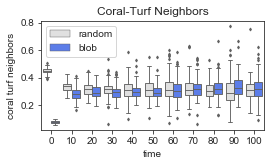

In [82]:
name='blob_v_random_coral_turf_neighbors_low_initial'

fig, ax = plt.subplots(figsize=(4,2))

sns.boxplot(x="time", y="coral_turf_neighbors", 
            hue="grid option", data=df[df['timestep'].isin(timesteps)], 
            palette=custom_palette, linewidth=.9, flierprops=dict(markersize=2)
           ).set(ylabel='coral turf neighbors')

ax.get_legend().set_title('')

plt.title('Coral-Turf Neighbors')
plt.savefig(path + name + extension, dpi=200, bbox_inches = "tight")


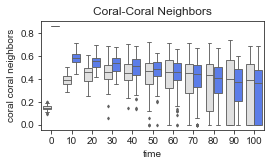

In [83]:
name='blob_v_random_coral_coral_neighbors_low_initial'

plt.figure(figsize=(4,2))
sns.boxplot(x="time", y='coral_coral_neighbors', 
            hue="grid option", data=df[df['timestep'].isin(timesteps)], 
            palette=custom_palette, linewidth=.9, flierprops=dict(markersize=2)
           ).set(ylabel='coral coral neighbors')

plt.title('Coral-Coral Neighbors')
plt.legend([],[], frameon=False)
plt.savefig(path + name + extension, dpi=200, bbox_inches = "tight")

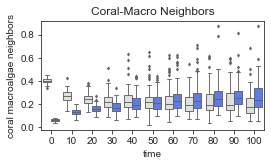

In [84]:
name='blob_v_random_coral_macro_neighbors_low_initial'

plt.figure(figsize=(4,2))
sns.boxplot(x="time", y='coral_macro_neighbors', 
            hue="grid option", data=df[df['timestep'].isin(timesteps)], 
            palette=custom_palette, linewidth=.9, flierprops=dict(markersize=2)
           ).set(ylabel='coral macroalgae neighbors')
plt.title('Coral-Macro Neighbors')
plt.legend([],[], frameon=False)                                 
plt.savefig(path + name + extension, dpi=200, bbox_inches = "tight")